In [3]:
import os
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Monetary Policy

In [106]:
data = pdr.get_data_fred(["FPCPITOTLZGUSA", "RIFSPFFNA","INTDSRUSM193N", "GDPPOT","GDPC1","INDPRO"],"1970-01-01", "2023-01-01").dropna()

In [107]:
data.to_excel('ipi.xlsx',index=True)

Text(0.5, 1.0, 'Inflation Rate')

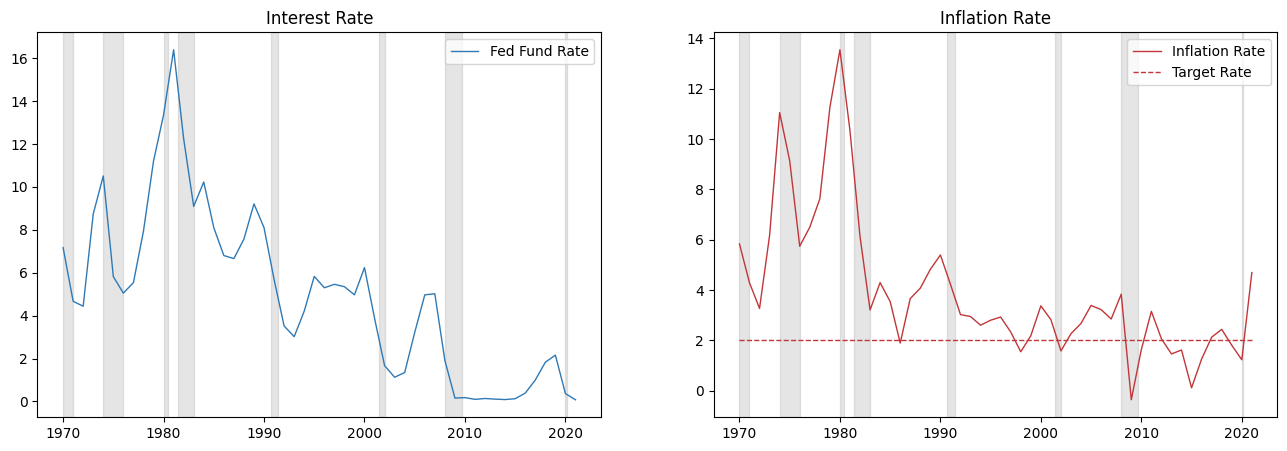

In [65]:
plt.figure(figsize=(16, 5))
colors=sns.color_palette(palette='RdBu')
plt.subplot(1,2,1)
sns.lineplot(x=data.index, y=data['FFD'], color=colors[-1], label='Fed Fund Rate', linewidth=1)
plt.axvspan('1970-01-01', '1971-01-01', color='gray', alpha=0.2)
plt.axvspan('1974-01-01', '1976-01-01', color='gray', alpha=0.2)
plt.axvspan('1980-01-01', '1980-06-01', color='gray', alpha=0.2)
plt.axvspan('1981-06-01', '1983-01-01', color='gray', alpha=0.2)
plt.axvspan('1990-09-01', '1991-06-01', color='gray', alpha=0.2)
plt.axvspan('2001-06-01', '2002-01-01', color='gray', alpha=0.2)
plt.axvspan('2008-01-01', '2009-09-01', color='gray', alpha=0.2)
plt.axvspan('2020-01-01', '2020-03-01', color='gray', alpha=0.2)
plt.xlabel('')
plt.ylabel('')
plt.title('Interest Rate')

plt.subplot(1,2,2)
colors=sns.color_palette(palette='RdBu')
sns.lineplot(x=data.index, y=data['INF'], color=colors[0], label='Inflation Rate', linewidth=1)
sns.lineplot(x=data.index, y=2, color=colors[0], label='Target Rate', linestyle="--",linewidth=1)
plt.axvspan('1970-01-01', '1971-01-01', color='gray', alpha=0.2)
plt.axvspan('1974-01-01', '1976-01-01', color='gray', alpha=0.2)
plt.axvspan('1980-01-01', '1980-06-01', color='gray', alpha=0.2)
plt.axvspan('1981-06-01', '1983-01-01', color='gray', alpha=0.2)
plt.axvspan('1990-09-01', '1991-06-01', color='gray', alpha=0.2)
plt.axvspan('2001-06-01', '2002-01-01', color='gray', alpha=0.2)
plt.axvspan('2008-01-01', '2009-09-01', color='gray', alpha=0.2)
plt.axvspan('2020-01-01', '2020-03-01', color='gray', alpha=0.2)

plt.xlabel('')
plt.ylabel('')
plt.title('Inflation Rate')



In [62]:
data.rename(columns={"FPCPITOTLZGUSA":"INF", "RIFSPFFNA":"FFD","INTDSRUSM193N":"NIR"},inplace=True)

**Taylor rule:**      $R_t^T = r_t^{LR} + \pi_t + 0.5(\pi_t - \pi^*) + 0.5(y_t - y_t^P)$

In [63]:
data[['LNGDPPOT','LNGDP']]=data[['GDPPOT','GDPC1']].apply(lambda x: np.log(x)*100-np.log(x).shift(1)*100)

In [64]:
# ln_PCE = pd.DataFrame()
# ln_PCE['ln_PCE'] = data.loc[(data.index >= '2000-01-01') & (data.index <= '2023-01-01'), 'ln_PCE']
data['TR'] = data['NIR']+ data['INF'] +0.5* (data['INF']- 2) + 0.5*(data['LNGDP']-data['LNGDPPOT'])

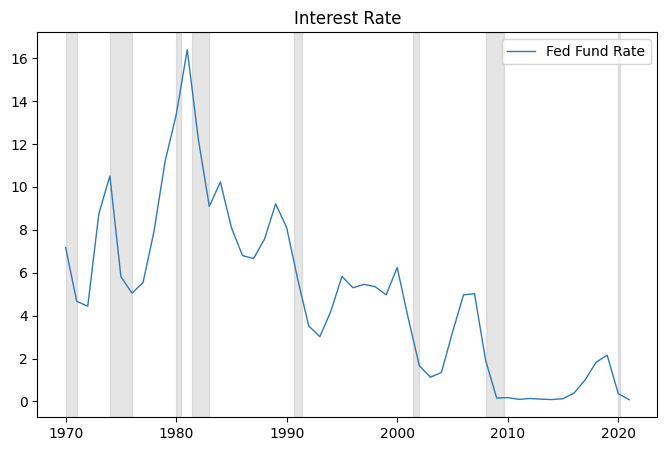

In [67]:
plt.figure(figsize=(8, 5))
colors=sns.color_palette(palette='RdBu')
sns.lineplot(x=data.index, y=data['FFD'], color=colors[-1], label='Fed Fund Rate', linewidth=1)
plt.axvspan('1970-01-01', '1971-01-01', color='gray', alpha=0.2)
plt.axvspan('1974-01-01', '1976-01-01', color='gray', alpha=0.2)
plt.axvspan('1980-01-01', '1980-06-01', color='gray', alpha=0.2)
plt.axvspan('1981-06-01', '1983-01-01', color='gray', alpha=0.2)
plt.axvspan('1990-09-01', '1991-06-01', color='gray', alpha=0.2)
plt.axvspan('2001-06-01', '2002-01-01', color='gray', alpha=0.2)
plt.axvspan('2008-01-01', '2009-09-01', color='gray', alpha=0.2)
plt.axvspan('2020-01-01', '2020-03-01', color='gray', alpha=0.2)
plt.xlabel('')
plt.ylabel('')
plt.title('Interest Rate')
plt.show()

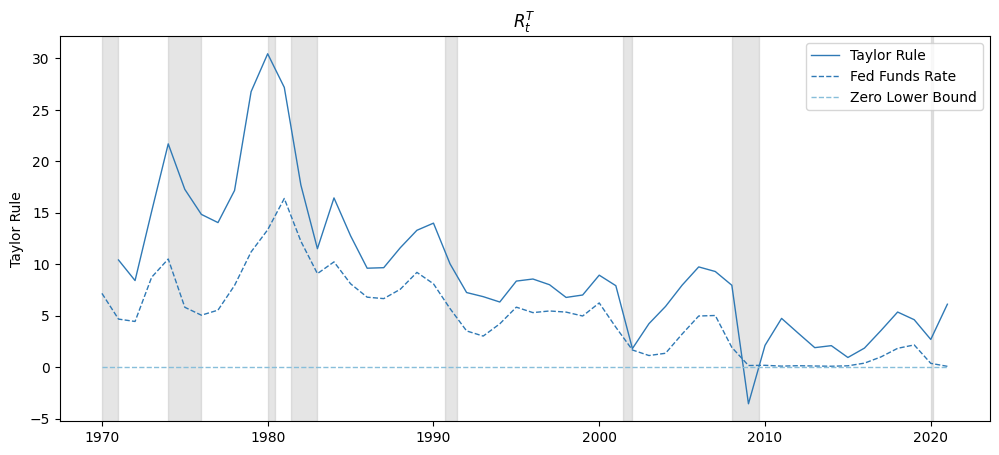

In [26]:
plt.figure(figsize=(12, 5))
colors=sns.color_palette(palette='RdBu')
sns.lineplot(x=data.index, y=data['TR'], color=colors[-1], label='Taylor Rule', linewidth=1)
sns.lineplot(x=data.index, y=data['FFD'], color=colors[-1], label='Fed Funds Rate', linestyle="--", linewidth=1)
sns.lineplot(x=data.index, y=0, color=colors[-2], label='Zero Lower Bound', linestyle="--", linewidth=1)
plt.axvspan('1970-01-01', '1971-01-01', color='gray', alpha=0.2)
plt.axvspan('1974-01-01', '1976-01-01', color='gray', alpha=0.2)
plt.axvspan('1980-01-01', '1980-06-01', color='gray', alpha=0.2)
plt.axvspan('1981-06-01', '1983-01-01', color='gray', alpha=0.2)
plt.axvspan('1990-09-01', '1991-06-01', color='gray', alpha=0.2)
plt.axvspan('2001-06-01', '2002-01-01', color='gray', alpha=0.2)
plt.axvspan('2008-01-01', '2009-09-01', color='gray', alpha=0.2)
plt.axvspan('2020-01-01', '2020-03-01', color='gray', alpha=0.2)
plt.xlabel('')
plt.ylabel('Taylor Rule')
plt.title(r'$R_t^{T}$')
plt.show()

## Housing Market

In [40]:
data2 = pdr.get_data_fred(["PRFI", "PCE","FGEXPND","PNFI","GDPC1","QUSR628BIS","DSPIC96","SUBLPDRCSC"],"1947-01-01", "2024-01-01")
#real or nominal?

In [41]:
data2.rename(columns={"FGEXPND":"GE","QUSR628BIS":"HI","DSPIC96":"INCOME","SUBLPDRCSC":"NPCL"},inplace=True)
data2[["LNPRFI", "LNPCE","LNGE","LNPNFI","LNGDP"]]= data2[["PRFI", "PCE","GE","PNFI","GDPC1"]].apply(lambda x: np.log(x)*100-np.log(x).shift(1)*100)

In [139]:
data3 = pdr.get_data_fred(["HOUST"],"1969-01-01", "2024-01-01")
data3=data3.resample('A').mean()

In [140]:
data3[["LNHS"]]=data3[["HOUST"]].apply(lambda x: np.log(x)*100-np.log(x).shift(1)*100)

In [148]:
credit = pd.read_excel('us.xlsx')
credit['year'] = pd.to_datetime(credit['year'])
credit.set_index('year', inplace=True)

In [149]:
credit

,country,ctry_code,ir,house_price_growth,gdp_growth,work_age_growth,gdppc_growth,credit_growth
year,,,,,,,,
1980-01-01,United States,US,13.35,0.314316,1.410558,1.608263,0.256684,9.081537
1981-01-01,United States,US,16.39,-2.282816,1.587336,1.420751,0.532907,7.222231
1982-01-01,United States,US,12.24,-3.549725,-2.214863,1.157478,-3.186961,4.567385
1983-01-01,United States,US,9.09,-1.576729,1.421324,0.905560,0.496719,9.639578
1984-01-01,United States,US,10.23,0.667307,8.229904,1.208700,7.351041,11.683237
1985-01-01,United States,US,8.10,1.147787,4.454136,0.929490,3.579987,16.385213
1986-01-01,United States,US,6.80,3.944171,4.062460,1.170413,3.146928,10.676687
1987-01-01,United States,US,6.66,6.853167,2.675473,1.003585,1.782462,8.330364
1988-01-01,United States,US,7.57,4.038229,4.153781,1.001593,3.251005,9.573539


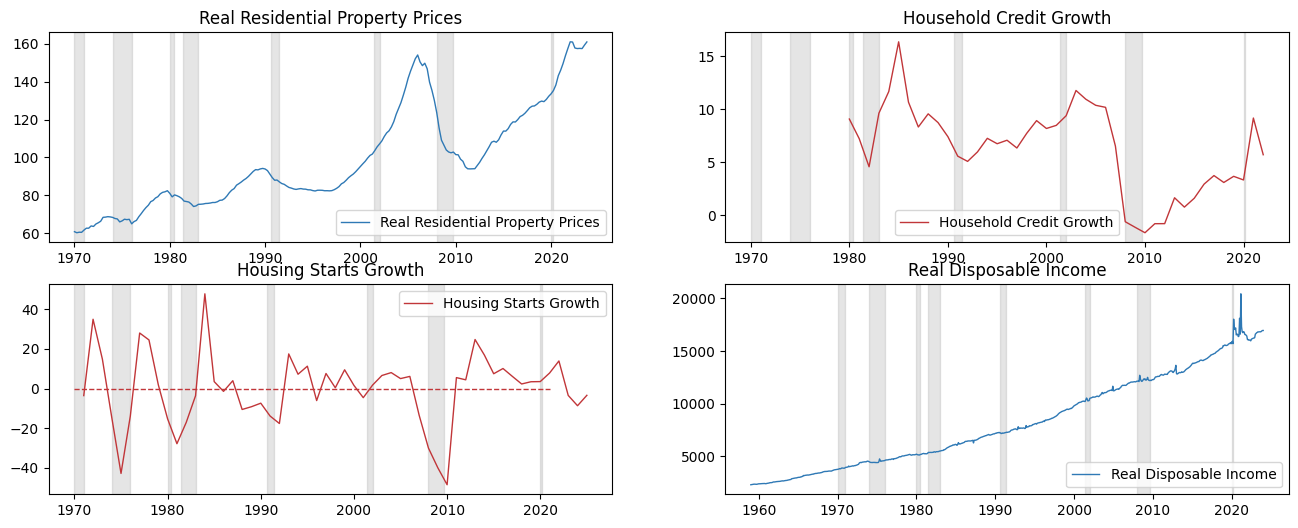

In [155]:
plt.figure(figsize=(16, 6))
colors=sns.color_palette(palette='RdBu')
plt.subplot(2,2,1)
sns.lineplot(x=data2.index, y=data2['HI'], color=colors[-1], label='Real Residential Property Prices', linewidth=1)
# sns.lineplot(x=data.index, y=data['FFD'], color=colors[-1], label='Fed Funds Rate', linestyle="--", linewidth=1)
plt.axvspan('1970-01-01', '1971-01-01', color='gray', alpha=0.2)
plt.axvspan('1974-01-01', '1976-01-01', color='gray', alpha=0.2)
plt.axvspan('1980-01-01', '1980-06-01', color='gray', alpha=0.2)
plt.axvspan('1981-06-01', '1983-01-01', color='gray', alpha=0.2)
plt.axvspan('1990-09-01', '1991-06-01', color='gray', alpha=0.2)
plt.axvspan('2001-06-01', '2002-01-01', color='gray', alpha=0.2)
plt.axvspan('2008-01-01', '2009-09-01', color='gray', alpha=0.2)
plt.axvspan('2020-01-01', '2020-03-01', color='gray', alpha=0.2)
plt.xlabel('')
plt.ylabel('')
plt.title('Real Residential Property Prices')
# plt.title(r'$HI_t$')

plt.subplot(2,2,2)
sns.lineplot(x=credit.index, y=credit['credit_growth'], color=colors[0], label='Household Credit Growth', linewidth=1)
# sns.lineplot(x=data.index, y=data['FFD'], color=colors[-1], label='Fed Funds Rate', linestyle="--", linewidth=1)
plt.axvspan('1970-01-01', '1971-01-01', color='gray', alpha=0.2)
plt.axvspan('1974-01-01', '1976-01-01', color='gray', alpha=0.2)
plt.axvspan('1980-01-01', '1980-06-01', color='gray', alpha=0.2)
plt.axvspan('1981-06-01', '1983-01-01', color='gray', alpha=0.2)
plt.axvspan('1990-09-01', '1991-06-01', color='gray', alpha=0.2)
plt.axvspan('2001-06-01', '2002-01-01', color='gray', alpha=0.2)
plt.axvspan('2008-01-01', '2009-09-01', color='gray', alpha=0.2)
plt.axvspan('2020-01-01', '2020-03-01', color='gray', alpha=0.2)
plt.xlabel('')
plt.ylabel('')
plt.title('Household Credit Growth')

plt.subplot(2,2,3)
sns.lineplot(x=data3.index, y=data3['LNHS'], color=colors[0], label='Housing Starts Growth', linewidth=1)
# sns.lineplot(x=data.index, y=data['FFD'], color=colors[-1], label='Fed Funds Rate', linestyle="--", linewidth=1)
sns.lineplot(x=data.index, y=0, color=colors[0], linestyle="--",linewidth=1)
plt.axvspan('1970-01-01', '1971-01-01', color='gray', alpha=0.2)
plt.axvspan('1974-01-01', '1976-01-01', color='gray', alpha=0.2)
plt.axvspan('1980-01-01', '1980-06-01', color='gray', alpha=0.2)
plt.axvspan('1981-06-01', '1983-01-01', color='gray', alpha=0.2)
plt.axvspan('1990-09-01', '1991-06-01', color='gray', alpha=0.2)
plt.axvspan('2001-06-01', '2002-01-01', color='gray', alpha=0.2)
plt.axvspan('2008-01-01', '2009-09-01', color='gray', alpha=0.2)
plt.axvspan('2020-01-01', '2020-03-01', color='gray', alpha=0.2)
plt.xlabel('')
plt.ylabel('')
plt.title('Housing Starts Growth')

plt.subplot(2,2,4)
sns.lineplot(x=data2.index, y=data2['INCOME'], color=colors[-1], label='Real Disposable Income', linewidth=1)
# sns.lineplot(x=data.index, y=data['FFD'], color=colors[-1], label='Fed Funds Rate', linestyle="--", linewidth=1)
plt.axvspan('1970-01-01', '1971-01-01', color='gray', alpha=0.2)
plt.axvspan('1974-01-01', '1976-01-01', color='gray', alpha=0.2)
plt.axvspan('1980-01-01', '1980-06-01', color='gray', alpha=0.2)
plt.axvspan('1981-06-01', '1983-01-01', color='gray', alpha=0.2)
plt.axvspan('1990-09-01', '1991-06-01', color='gray', alpha=0.2)
plt.axvspan('2001-06-01', '2002-01-01', color='gray', alpha=0.2)
plt.axvspan('2008-01-01', '2009-09-01', color='gray', alpha=0.2)
plt.axvspan('2020-01-01', '2020-03-01', color='gray', alpha=0.2)
plt.xlabel('')
plt.ylabel('')
plt.title('Real Disposable Income')
# plt.title(r'$HI_t$')



plt.show()



## Australia

In [96]:
aus = pd.read_excel('./Australia housing index.xlsx')
aus[['house growth','work growth','credit growth','gdp per capita growth']]=aus[['Residential PPI','working age ','credit to household','gdp per capita']].apply(lambda x: np.log(x)*100-np.log(x).shift(1)*100)


In [97]:
aus.columns

Index(['country', 'year', 'Residential PPI', 'nominal PPI', 'Real GDP growth',
       'inflation rate', 'short term interest rate(cash rate)',
       'credit to household', 'working age ', 'gdp per capita', 'house growth',
       'work growth', 'credit growth', 'gdp per capita growth'],
      dtype='object')

In [98]:
aus.head()

,country,year,Residential PPI,nominal PPI,Real GDP growth,inflation rate,short term interest rate(cash rate),credit to household,working age,gdp per capita,house growth,work growth,credit growth,gdp per capita growth
0,Australia,1980,31.261305,8.434579,2.894,10.1,12.03,64.224,9501146.50,30717.756144,NaN,NaN,NaN,NaN
1,Australia,1981,32.948441,9.707712,4.127,9.5,15.04,71.325,9676551.25,31251.768309,5.256288,1.829309,10.486992,1.723510
2,Australia,1982,30.937095,10.055031,0.063,11.4,16.83,69.543,9870191.50,31735.939230,-6.298800,1.981369,-2.530163,1.537381
3,Australia,1983,29.920095,10.629636,-0.474,10.0,12.20,70.161,10040446.25,30608.229443,-3.342560,1.710231,0.884733,-3.618086
4,Australia,1984,31.365426,11.853867,6.346,4.0,12.10,73.812,10200730.00,31631.630892,4.717587,1.583773,5.072872,3.288869


In [100]:
aus.to_excel('australia.xlsx',index=False)

## household debt to GDP

In [47]:
cgdp =  pd.read_excel('./bis_dp_search_export.xlsx', sheet_name = "timeseries observations")

In [48]:
cgdp.rename(columns={'TIME_PERIOD:Period':'Date','BORROWERS_CTY:Borrowers country':'Country','OBS_VALUE:Value': 'Value'},inplace =True)
cgdp = cgdp[['Date','Country','Value']]

In [49]:
cgdp['Date'] = pd.to_datetime(cgdp['Date'])
cgdp = cgdp.set_index('Date')

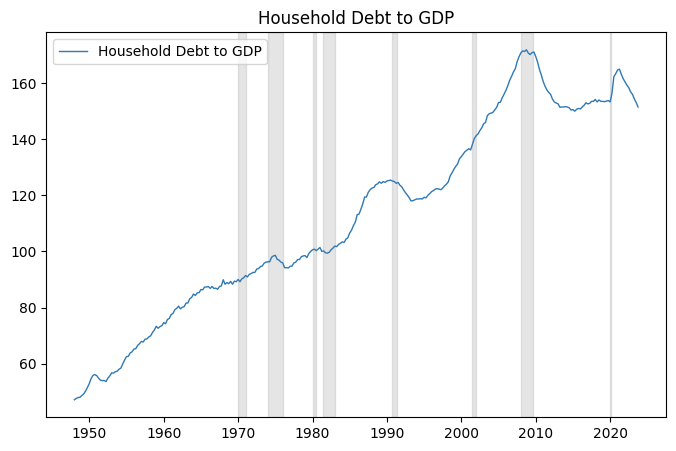

In [50]:
plt.figure(figsize=(8, 5))
colors=sns.color_palette(palette='RdBu')
sns.lineplot(x=cgdp.index, y=cgdp['Value'], color=colors[-1], label='Household Debt to GDP', linewidth=1)
# sns.lineplot(x=data.index, y=data['FFD'], color=colors[-1], label='Fed Funds Rate', linestyle="--", linewidth=1)
plt.axvspan('1970-01-01', '1971-01-01', color='gray', alpha=0.2)
plt.axvspan('1974-01-01', '1976-01-01', color='gray', alpha=0.2)
plt.axvspan('1980-01-01', '1980-06-01', color='gray', alpha=0.2)
plt.axvspan('1981-06-01', '1983-01-01', color='gray', alpha=0.2)
plt.axvspan('1990-09-01', '1991-06-01', color='gray', alpha=0.2)
plt.axvspan('2001-06-01', '2002-01-01', color='gray', alpha=0.2)
plt.axvspan('2008-01-01', '2009-09-01', color='gray', alpha=0.2)
plt.axvspan('2020-01-01', '2020-03-01', color='gray', alpha=0.2)
plt.xlabel('')
plt.ylabel('')
plt.title('Household Debt to GDP')
plt.show()

In [115]:
corr =  pd.read_excel('./final_corr_2.xlsx')
corr['date'] = pd.to_datetime(corr['date'])
corr.set_index('date', inplace=True)

In [116]:
corr.head()

,start,end,_b_gdp_shock,_b_inf_shock,_b_cons,_se_gdp_shock,_se_inf_shock,_se_cons,beta_sg,beta_sp,...,cov_gdp_inf,_merge,cov_sb,var_s,var_b,corr_sb,V,cpi_g,ipi_g,corr_gdp_inf
date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,1,10,-15.712502,3.481554,7.820011,10.651885,4.234188,3.999648,-15.712502,3.481554,...,-0.016370,Matched (3),3.223711,75.938156,0.314749,0.659393,NaN,0.733581,1.851018,-0.063625
1995-04-01,2,11,-27.388979,4.695787,9.812520,8.678609,4.621471,4.219779,-27.388979,4.695787,...,-0.016315,Matched (3),5.162959,225.045547,0.305324,0.622849,NaN,0.860078,-0.159929,-0.064375
1995-07-01,3,12,-32.629612,6.240417,9.497421,9.659418,4.587909,3.688922,-32.629612,6.240417,...,-0.010268,Matched (3),7.399001,301.520721,0.378570,0.692535,NaN,0.525625,0.397734,-0.041714
1995-10-01,4,13,-27.555923,5.652275,8.359619,9.547994,4.787015,4.007383,-27.555923,5.652275,...,-0.009951,Matched (3),6.509155,215.793411,0.393598,0.706283,NaN,0.588045,1.523621,-0.040391
1996-01-01,5,14,-23.559681,3.226603,5.496303,9.343575,4.903782,3.886869,-23.559681,3.226603,...,-0.012565,Matched (3),5.321183,153.737259,0.369965,0.705567,NaN,0.778719,0.060360,-0.051740


In [129]:
corr['mean_sg'] = corr['beta_sg'].mean()
corr['mean_sp'] = corr['beta_sp'].mean()
corr['mean_bg'] = corr['beta_bg'].mean()
corr['mean_bp'] = corr['beta_bp'].mean()

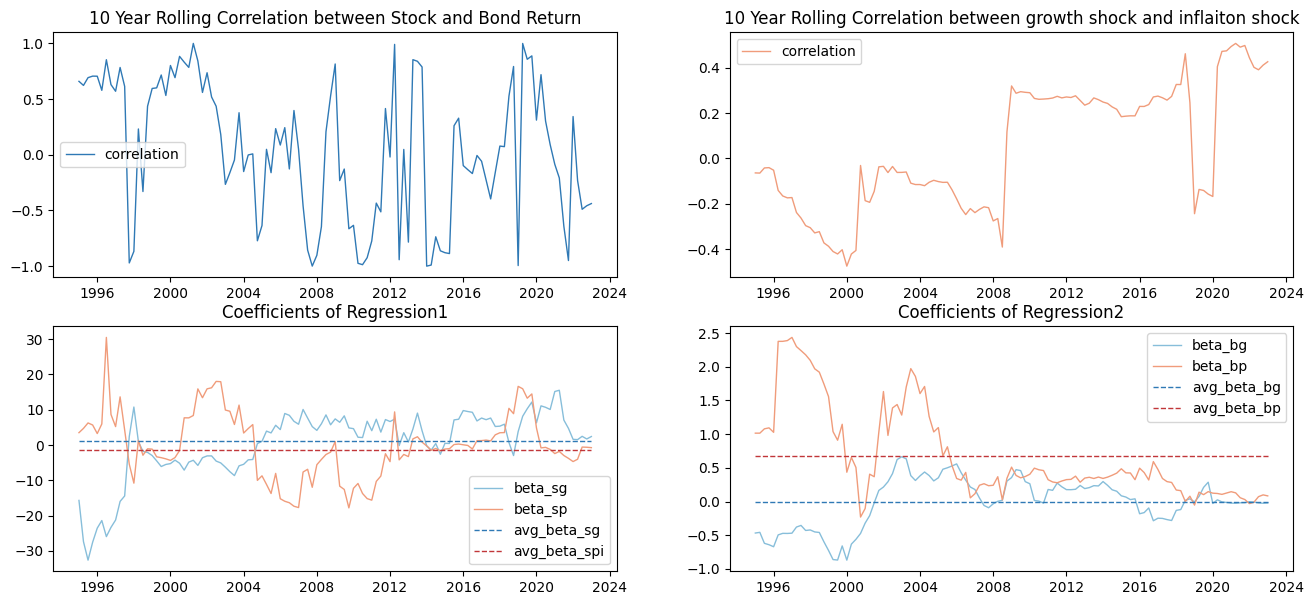

In [133]:
plt.figure(figsize=(16, 7))
colors=sns.color_palette(palette='RdBu')

plt.subplot(2,2,1)
sns.lineplot(x = corr.index, y=corr['corr_sb'], color=colors[-1], label='correlation', linewidth=1)
plt.xlabel('')
plt.ylabel('')
plt.title('10 Year Rolling Correlation between Stock and Bond Return')
plt.subplot(2,2,2)
sns.lineplot(x = corr.index, y=corr['corr_gdp_inf'], color=colors[1], label='correlation', linewidth=1)
plt.xlabel('')
plt.ylabel('')
plt.title('10 Year Rolling Correlation between growth shock and inflaiton shock')
plt.subplot(2,2,3)
sns.lineplot(x = corr.index, y=corr['beta_sg'], color=colors[-2], label='beta_sg', linewidth=1)
sns.lineplot(x = corr.index, y=corr['beta_sp'], color=colors[1], label='beta_sp', linewidth=1)
sns.lineplot(x = corr.index, y=corr['mean_sg'], color=colors[-1], label='avg_beta_sg',linestyle="--",  linewidth=1)
sns.lineplot(x = corr.index, y=corr['mean_sp'], color=colors[0], label='avg_beta_spi', linestyle="--", linewidth=1)
plt.xlabel('')
plt.ylabel('')
plt.title('Coefficients of Regression1')
plt.subplot(2,2,4)
sns.lineplot(x = corr.index, y=corr['beta_bg'], color=colors[-2], label='beta_bg', linewidth=1)
sns.lineplot(x = corr.index, y=corr['beta_bp'], color=colors[1], label='beta_bp', linewidth=1)
sns.lineplot(x = corr.index, y=corr['mean_bg'], color=colors[-1], label='avg_beta_bg',linestyle="--",  linewidth=1)
sns.lineplot(x = corr.index, y=corr['mean_bp'], color=colors[0], label='avg_beta_bp', linestyle="--", linewidth=1)
plt.xlabel('')
plt.ylabel('')
plt.title('Coefficients of Regression2')
plt.show()

In [89]:
bond =  pd.read_excel('./spread2.xlsx')

In [90]:
bond.columns

Index(['date', 'sp500', 'y3', 'gnp', 'cpi', 'gdp', 'lngnp', 'y10', 'I',
       'gnp_growth', 'gdp_growth', 'time', 'insample', 'outsample', 'spread',
       'gdp_growth_hat', 'gdp_growth_hat_all', 'gdp_growth_hat_2'],
      dtype='object')

In [91]:

bond.head()

,date,sp500,y3,gnp,cpi,gdp,lngnp,y10,I,gnp_growth,gdp_growth,time,insample,outsample,spread,gdp_growth_hat,gdp_growth_hat_all,gdp_growth_hat_2
0,1985-01-01,180.660004,7.76,4255.859,105.7,8400.820,1.756082,11.760660,8400.820,NaN,NaN,1,1,0,4.000660,NaN,0.625615,NaN
1,1985-04-01,191.850006,7.95,4322.557,107.0,8474.787,1.555050,11.586500,8474.787,-0.201032,0.876617,2,1,0,3.636500,NaN,0.632483,NaN
2,1985-07-01,182.080002,7.08,4409.267,107.7,8604.220,1.986134,10.823490,8604.220,0.431083,1.515770,3,1,0,3.743490,NaN,0.630465,NaN
3,1985-10-01,211.279999,7.16,4469.698,108.5,8668.188,1.361238,10.335560,8668.188,-0.624896,0.740719,4,1,0,3.175560,NaN,0.641175,NaN
4,1986-01-01,238.899994,7.07,4530.053,109.9,8749.127,1.341279,9.766129,8749.127,-0.019959,0.929356,5,1,0,2.696129,NaN,0.650217,NaN


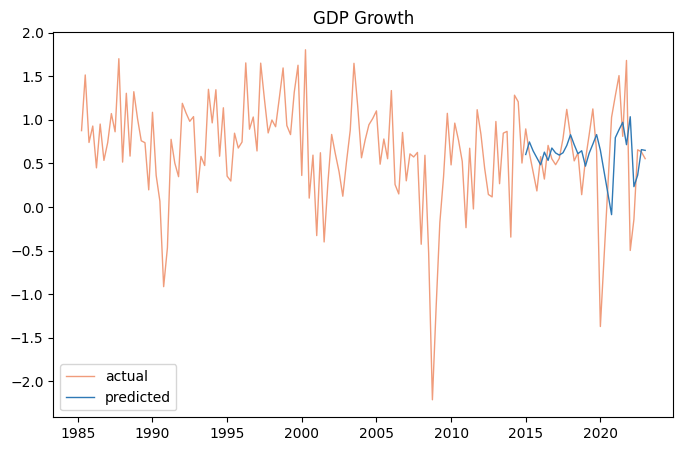

In [92]:
plt.figure(figsize=(8, 5))
colors=sns.color_palette(palette='RdBu')
sns.lineplot(x=bond['date'], y=bond['gdp_growth'], color=colors[1], label='actual', linewidth=1)
sns.lineplot(x=bond['date'], y=bond['gdp_growth_hat_2'], color=colors[-1], label='predicted', linewidth=1)

plt.xlabel('')
plt.ylabel('')
plt.title('GDP Growth')
plt.show()

In [1]:
# import yfinance as yf
# from pandas_datareader import data as pdr
    
# yf.pdr_override()     
# df = yf.download('INDEX', interval = '3mo',start='1970-01-01', end='2024-01-01',group_by='tickers')     
# df

In [6]:
# df = pd.read_excel('corr.xlsx', sheet_name='PCE')
# df.set_index('observation_date', inplace=True)
# df = df.resample('Q').sum() 
# df

In [5]:
# df.to_excel('PCE2.xlsx',index=True)

In [108]:
data3 = pdr.get_data_fred(["TB3MS","GNP","CPIAUCSL","GDPC1","INDPRO"],"1970-12-31", "2023-01-01").dropna()
data3[['LNGNP']]=data3[['GNP']].apply(lambda x: np.log(x)*100-np.log(x).shift(1)*100)
data3


,TB3MS,GNP,CPIAUCSL,GDPC1,INDPRO,LNGNP
DATE,,,,,,
1971-01-01,4.44,1142.570,39.900,5443.619,37.5184,NaN
1971-04-01,3.86,1164.246,40.100,5473.059,37.6164,1.879356
1971-07-01,5.40,1184.935,40.600,5518.072,37.8556,1.761425
1971-10-01,4.46,1198.025,40.900,5531.032,38.5339,1.098645
1972-01-01,3.38,1238.784,41.200,5632.649,40.0823,3.345589
...,...,...,...,...,...,...
2022-01-01,0.15,25177.759,282.390,21738.871,101.0227,1.404315
2022-04-01,0.76,25746.281,288.764,21708.160,102.7953,2.232916
2022-07-01,2.23,26185.893,294.977,21851.134,103.1328,1.693064


In [109]:
data3.to_excel('yield.xlsx',index=True)

In [44]:
data4 = pdr.get_data_fred(["DGS10"],"1970-12-31", "2023-01-01").dropna()
data4 = data4.resample('Q').mean() 
data4

,DGS10
DATE,
1970-12-31,6.500000
1971-03-31,5.999508
1971-06-30,6.251587
1971-09-30,6.485469
1971-12-31,5.888033
...,...
2021-12-31,1.533387
2022-03-31,1.951129
2022-06-30,2.932581


In [47]:
data4.to_excel('DGS10.xlsx',index=True)